<a href="https://colab.research.google.com/github/emiiliiojose/BusinessAnalysis/blob/main/Midterm_Emilio_Garcia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
display(titanic)
null_values = titanic.isnull().sum()
null_values.head(100)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
# 1.Calculate the percentage of missing values in each column.
print(len(titanic))
missing_values_percentage = titanic.isnull().sum() * 100 / len(titanic)
print("Percentage null values:\n", missing_values_percentage)

891
Percentage null values:
 survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [ ]:
# 2.Handle missing values if any are present by either filling or dropping them.

titanic['age'].fillna(titanic['age'].median())
titanic['embarked'].fillna(titanic['embarked'].mode()[0])
# titanic.drop('deck', axis=1, inplace=True)
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])
missing_values_percentage = titanic.isnull().sum() * 100 / len(titanic)
print("Percentage null values:\n", missing_values_percentage)

Percentage null values:
 survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64


In [ ]:
# 3.Generate summary statistics for numerical and categorical columns
numerical_summary = titanic.describe()
categorical_summary = titanic.describe(include=['object'])
print("\nNumerical Summary:\n", numerical_summary)
print("\nCategorical Summary:\n", categorical_summary)


Numerical Summary:
          survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Categorical Summary:
          sex embarked  who  embark_town alive
count    891      891  891          891   891
unique     2        3    3            3     2
top     male        S  man  Southampton    no
freq     577      646  537          646   549


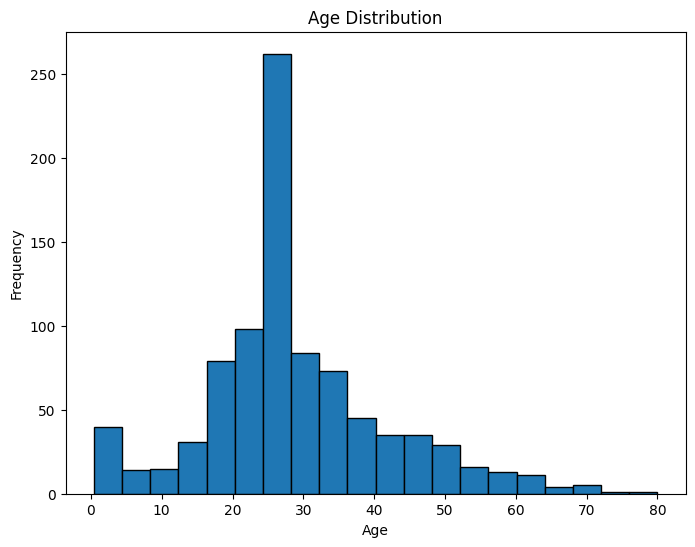

In [ ]:
# 4. Plot a histogram for the age distribution of the age column
plt.figure(figsize=(8, 6))
plt.hist(titanic['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

Text(0.5, 1.0, 'Fare Boxplot')

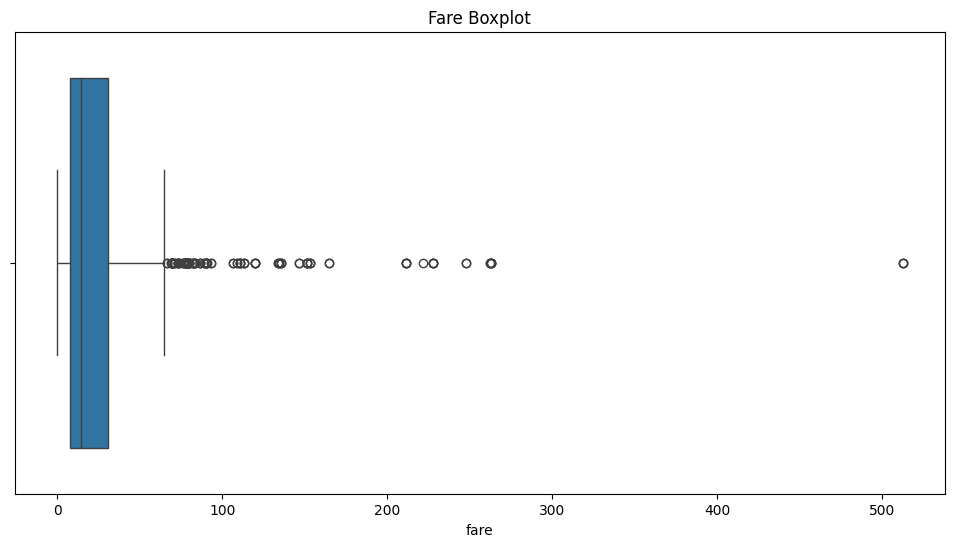

In [39]:
# 5. Boxplots to identify outliers
# Fare Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=titanic['fare'])
plt.title('Fare Boxplot')


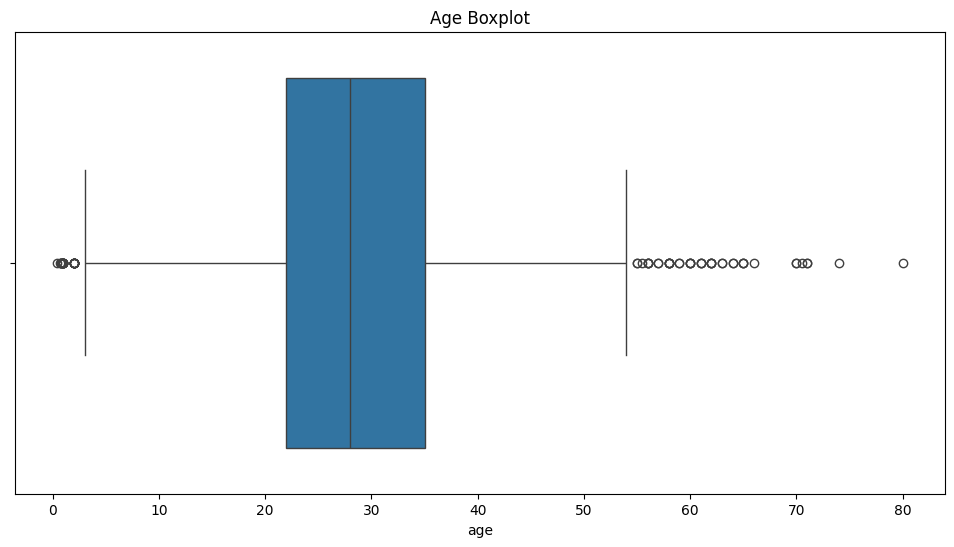

In [37]:
# Age plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=titanic['age'])
plt.title('Age Boxplot')
plt.show()

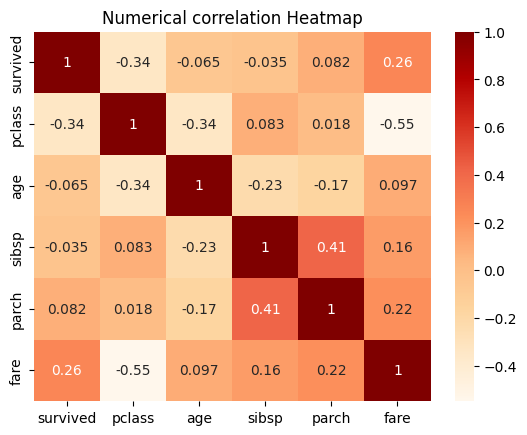

In [48]:
# 6.Calculate and visualize the correlation between numerical columns
correlation_matrix = titanic[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='OrRd')
plt.title('Numerical correlation Heatmap')
plt.show()

In [51]:
# 7.Average fare for each class
average_fare_by_class = titanic.groupby('class', observed=True)['fare'].mean()
print("Average fare by class:\n", average_fare_by_class)

Average fare by class:
 class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64


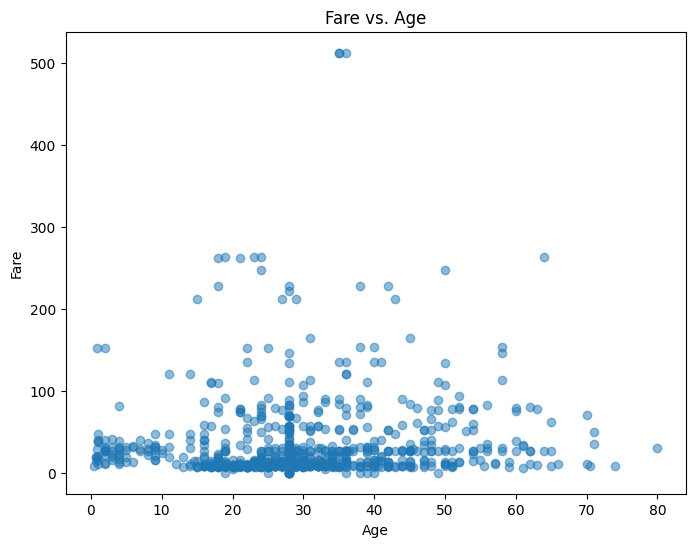

In [52]:
# 8.Scatter plot of fare vs. age
plt.figure(figsize=(8, 6))
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5)  # Added alpha for better visualization
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Fare vs. Age')
plt.show()